# Diabetes Predictor focused towards women
### Using Multiple Classification Algorithms w/  a Flask Web APP

### Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set()
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
import warnings
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

## Loading the Data

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1 dentoes that the person does have diabetes and 0 denotes that he doesn't.

## Exploratory Data Analysis


### Getting a first view of the data

In [3]:
diabetes_data.shape

(768, 9)

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 8 independent variables and Outcome is the dependent variable

In [5]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Basic numerical Statistics

In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


One thing to note from this summary is that certain attributes have a min vlaue of 0, when it shouldnt really be the case (For eg. a blood pressure of 0, only indicates that the person is dead, this doesnt make any sense)
Hence, we will have to treat '0' values as missing values

Replacing zeros with nans to make them easier to handle

In [8]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Looking at the data distrubution to fill the nan values

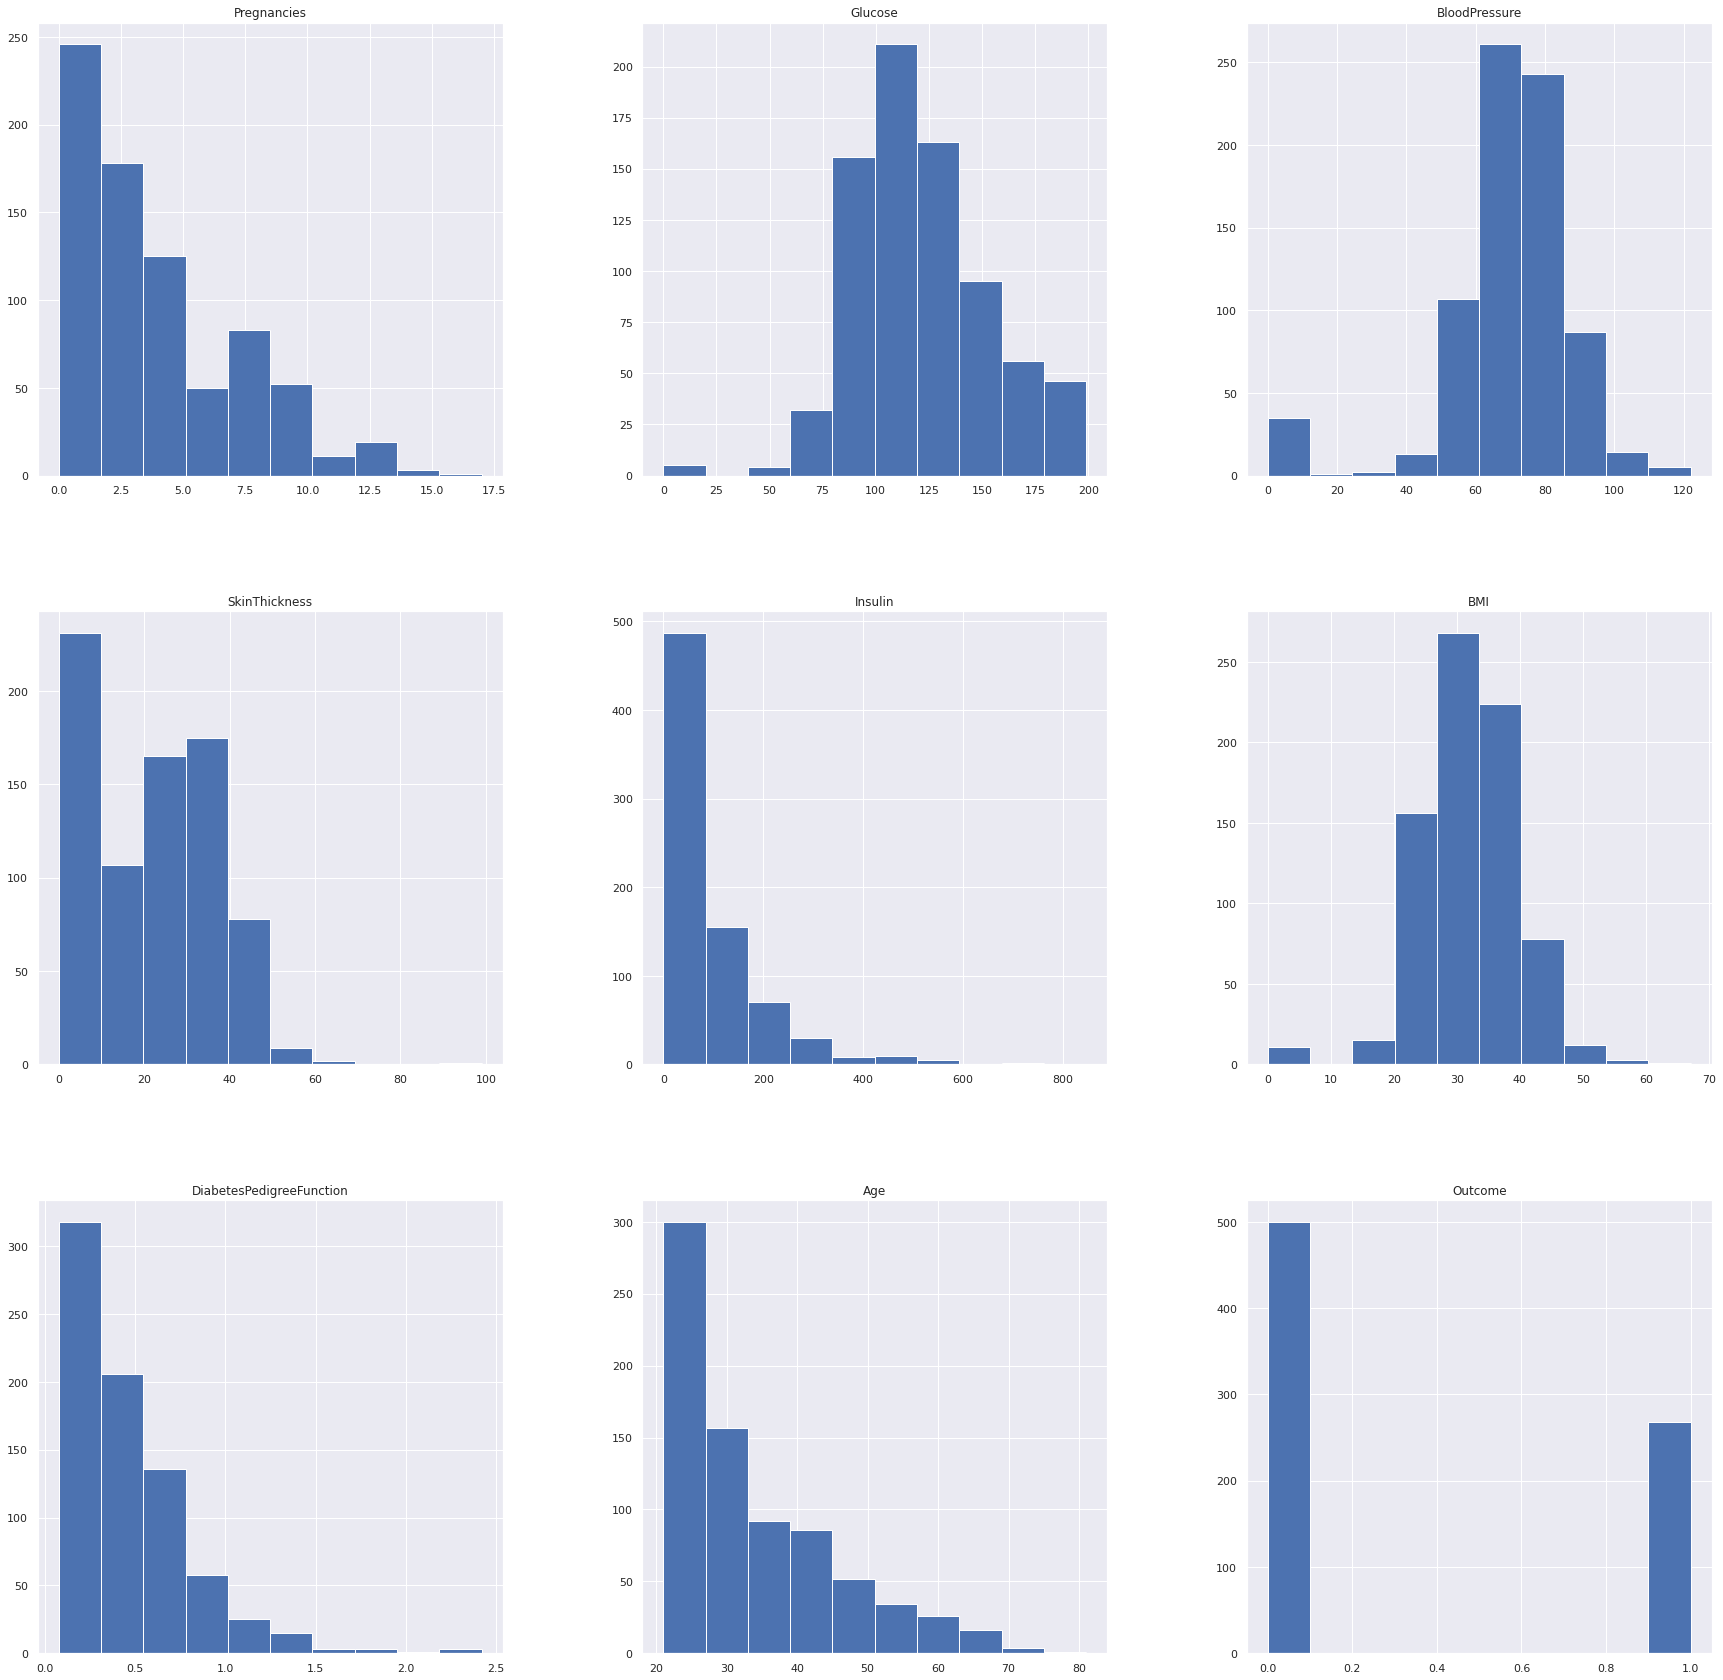

In [9]:
p = diabetes_data.hist(figsize = (30,30))

### Replacing nan values with other values depending on the data distribution

In [10]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

### Plotting after Nan removal 

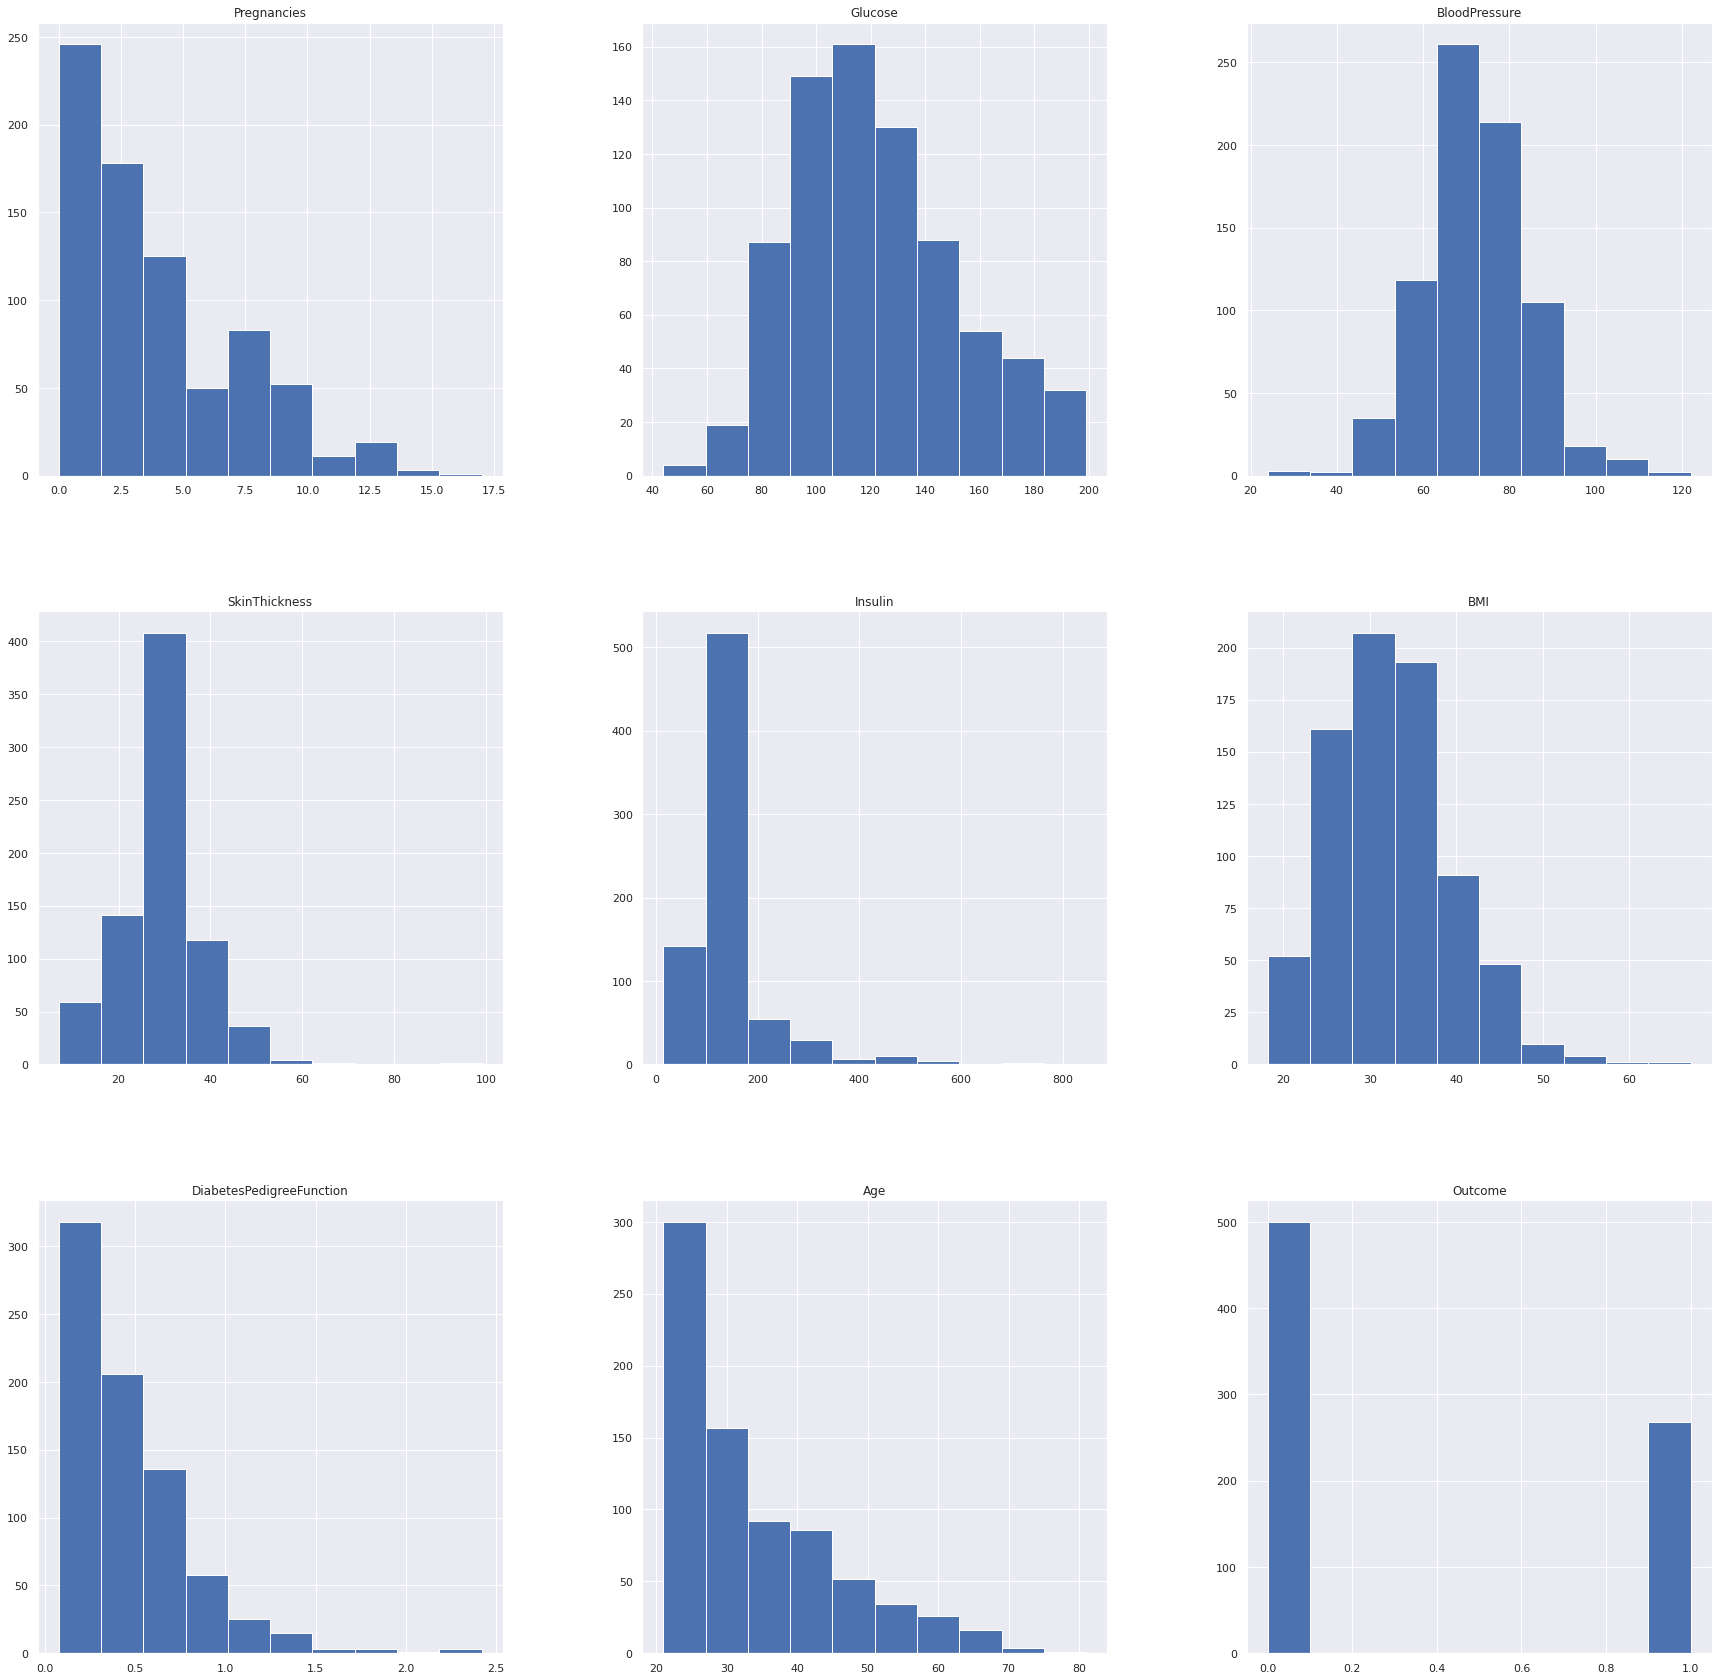

In [11]:
p = diabetes_data_copy.hist(figsize = (30,30))

### Outcomes


In [12]:
diabetes_data_copy["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

More 0s than 1s, data is more biased towards zeros. 

### Visiualsing the Data

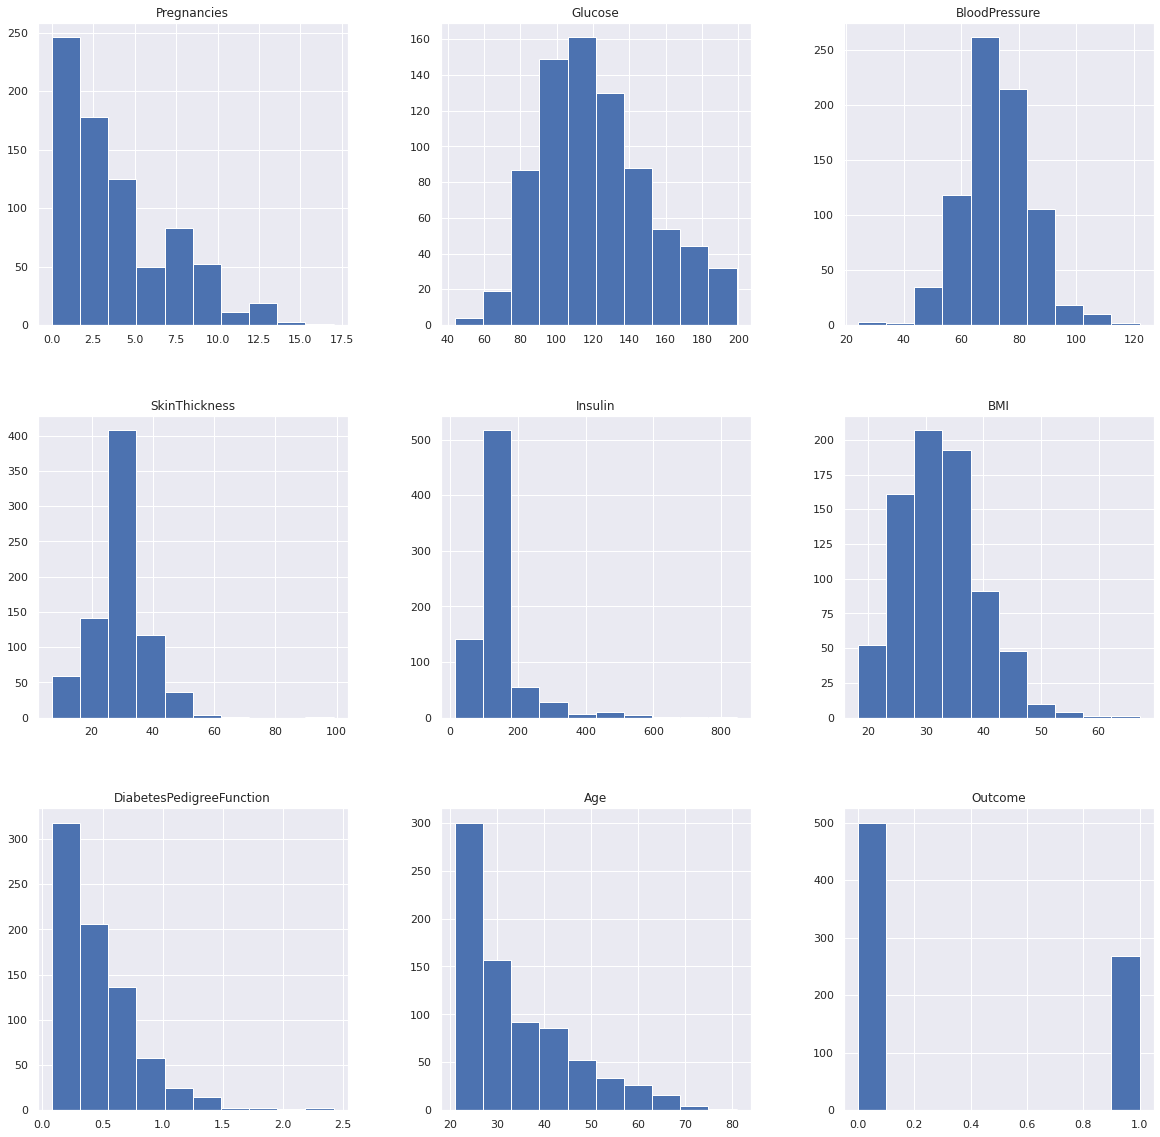

In [13]:
diabetes_data_copy.hist(bins=10,figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

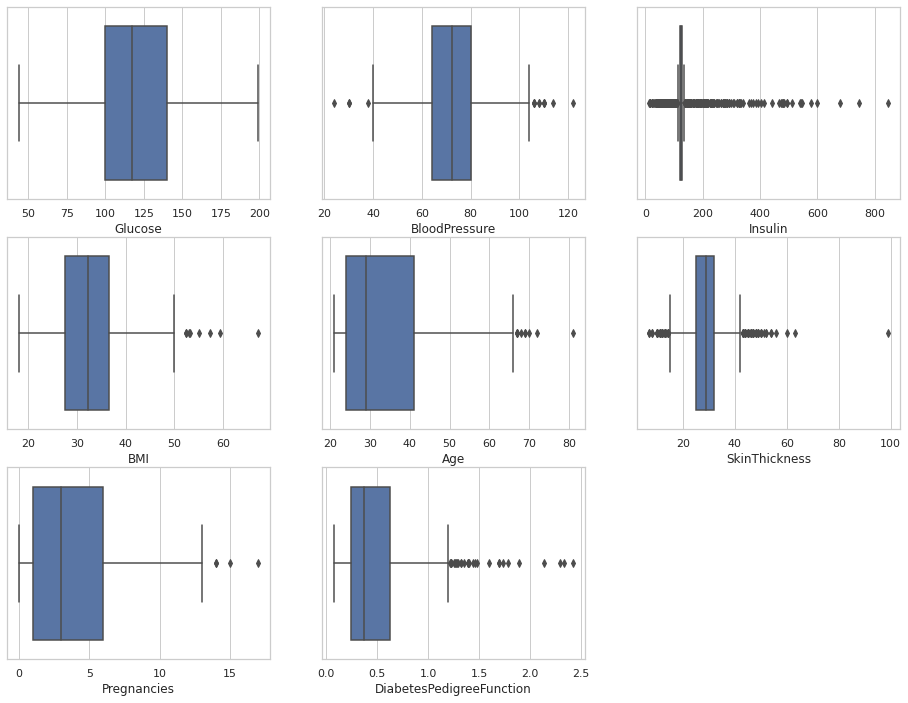

In [14]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=diabetes_data_copy)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=diabetes_data_copy)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=diabetes_data_copy)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=diabetes_data_copy)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=diabetes_data_copy)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=diabetes_data_copy)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=diabetes_data_copy)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes_data_copy)

Age V Outcome

<AxesSubplot:xlabel='Age', ylabel='Count'>

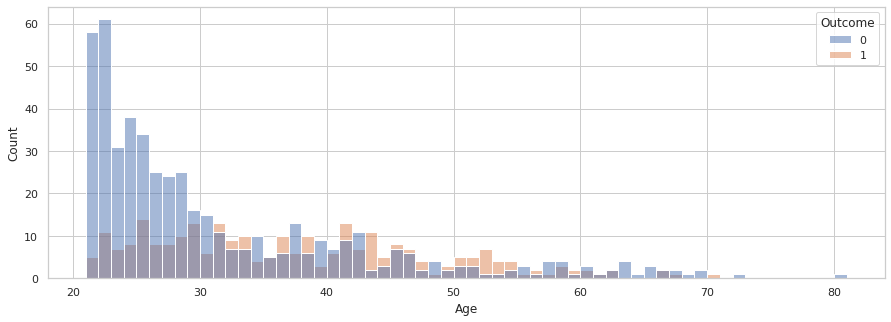

In [15]:
plt.figure(figsize = (15,5))
sns.set_style('whitegrid')
sns.histplot(data = diabetes_data_copy, x = 'Age', binwidth = 1, hue = 'Outcome')

Key thing to notice with the above plot is that people below the age of 40 have a very slim chance of contracting diabetes

Number of pregnancies V Outcome

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

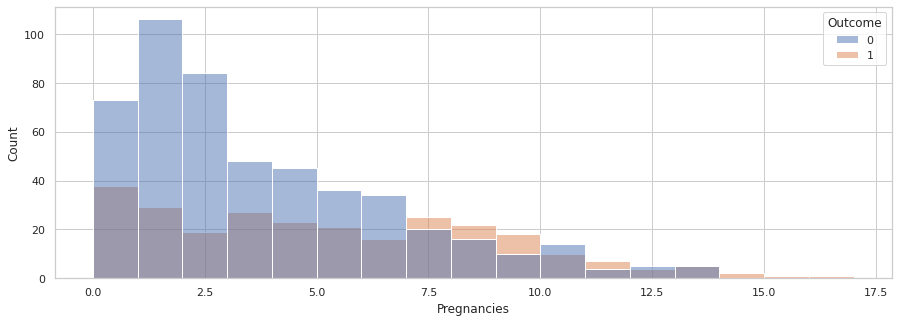

In [16]:
plt.figure(figsize = (15,5))
sns.set_style('whitegrid')
sns.histplot(data = diabetes_data_copy, x = 'Pregnancies', binwidth = 1, hue = 'Outcome')

Here, the co-relation isnt that apparent although more pregnancies is correlated to a highere chance of testing +ve.

Diabetes Pedigree Function V Outcome

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

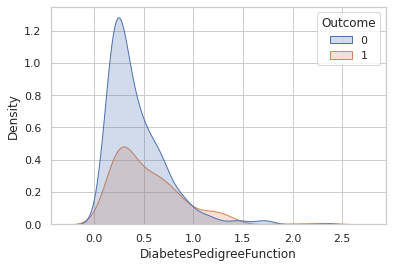

In [17]:
sns.kdeplot(x = "DiabetesPedigreeFunction", data = diabetes_data_copy, shade= True, hue= "Outcome")

Here no co-relation is apparent altough more people with 0 to 0.5 pdf have tested positive, there also more people in geneneral with a pdf of 0 to 0.5.

BMI V Outcome

<AxesSubplot:xlabel='BMI', ylabel='Density'>

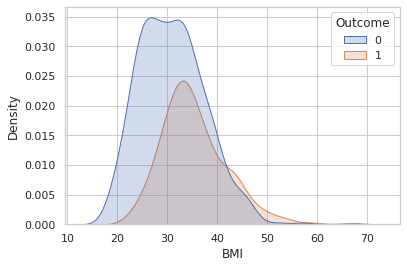

In [18]:
sns.kdeplot(x = "BMI", data = diabetes_data_copy, shade= True, hue= "Outcome")

People with a BMI below 20 have a very less chance of testing positive for diabetes

Glucose V Outcome

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

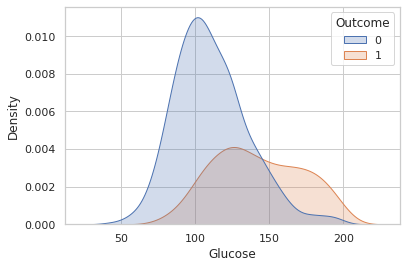

In [19]:
sns.kdeplot(x = "Glucose", data = diabetes_data_copy, shade= True, hue= "Outcome")

As expected, people with low glucose levels have a low channce of testing positive for diabetes

Insulin levels V Outcome

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

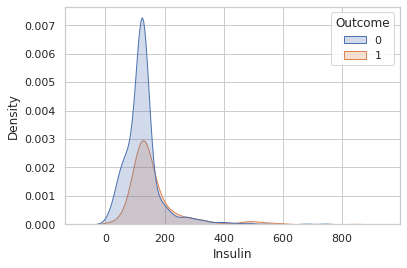

In [20]:
sns.kdeplot(x = "Insulin", data = diabetes_data_copy, shade= True, hue= "Outcome")

A lower insulin level signifies that the person has a less chance of contracting diabetes

#### Scatter matrix of uncleaned data

Heatmap of the unclean data

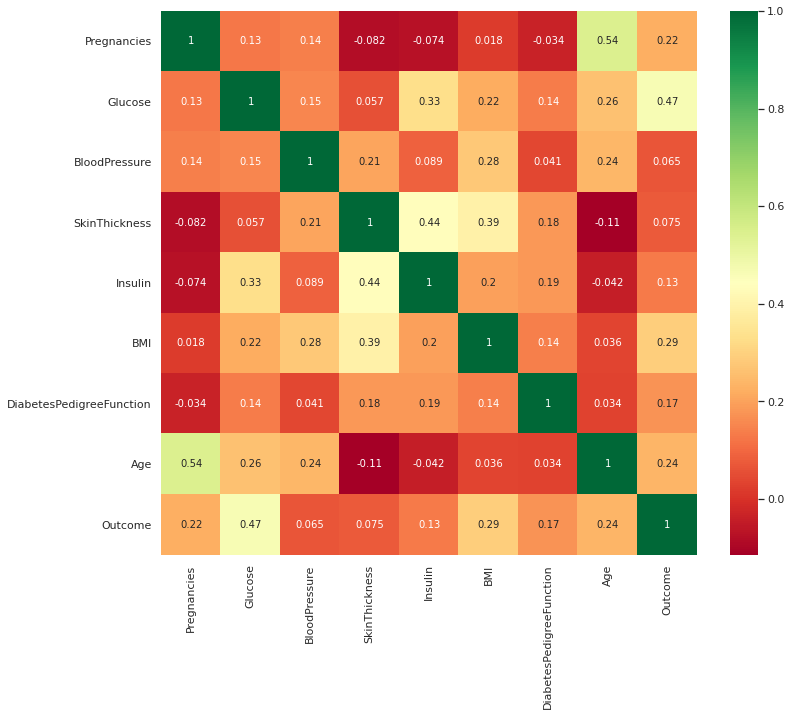

In [21]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Heatmap for clean data

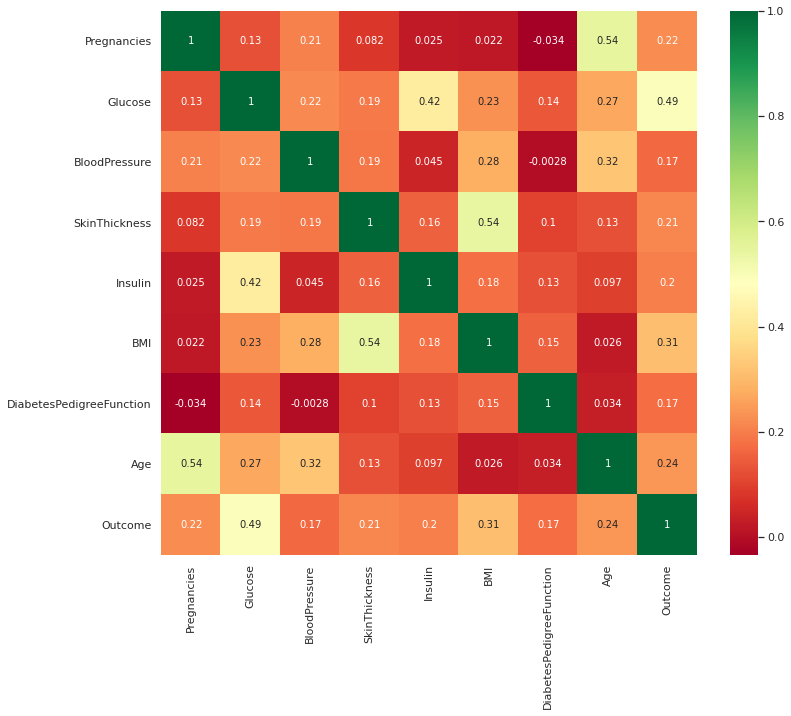

In [22]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### Training the Model

Scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [25]:
y = diabetes_data_copy.Outcome

Splitting the data into train and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1, stratify=y)

In [27]:
print(X_train)

     Pregnancies       Glucose  BloodPressure  SkinThickness   Insulin  \
394     0.046014  1.193881e+00       0.462823      -0.012301 -0.181541   
353    -0.844885 -1.041775e+00      -0.860753      -1.947309 -1.131420   
444     0.046014 -1.540881e-01      -0.860753      -1.947309 -0.181541   
496     0.342981 -3.842292e-01      -0.364412      -0.012301 -0.181541   
133     1.233880 -1.239039e+00       0.131929       0.215347 -0.181541   
..           ...           ...            ...            ...       ...   
349     0.342981 -4.672145e-16       0.628269       0.329171 -0.181541   
129    -1.141852 -5.486156e-01       0.959163      -0.012301 -0.181541   
635     2.718712 -5.814929e-01      -0.033518      -0.012301 -0.181541   
588    -0.250952  1.785672e+00       1.124610      -0.239949  0.177559   
556    -0.844885 -8.116340e-01      -0.198965       1.239762 -0.181541   

          BMI  DiabetesPedigreeFunction       Age  
394  0.064737                  1.000033 -0.190672  
353 -0.

### Applying SVM

In [28]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
Y_predSVM=svc.predict(X_test)
AS2=accuracy_score(Y_predSVM,y_test)
AS2

0.765625

#### Confusion Matrix for SVM

In [29]:
confusion_matrix(y_test,Y_predSVM)
pd.crosstab(y_test,Y_predSVM, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,149,18,167
1,42,47,89
All,191,65,256


### Applying Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1001)
rfc.fit(X_train,y_train)
Y_predRFR=rfc.predict(X_test)
AS3=accuracy_score(Y_predRFR,y_test)
AS3

0.75390625

#### Confusion Matrix for RFG

In [31]:
confusion_matrix(y_test,Y_predRFR)
pd.crosstab(y_test, Y_predRFR, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,140,27,167
1,36,53,89
All,176,80,256


### Applying Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
Y_predLR=logreg.predict(X_test)
AS4=accuracy_score(Y_predLR,y_test)
AS4

0.765625

### Confusion Matrix for Logistic Regression

In [33]:
confusion_matrix(y_test,Y_predLR)
pd.crosstab(y_test, Y_predLR, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,148,19,167
1,41,48,89
All,189,67,256


### Applying Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_predNB=logreg.predict(X_test)
AS5=accuracy_score(Y_predNB,y_test)
AS5

0.765625

#### Confusion Matrix for Naive Bayes

In [35]:
confusion_matrix(y_test,Y_predNB)
pd.crosstab(y_test, Y_predNB, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,148,19,167
1,41,48,89
All,189,67,256


### Applying KNN 


In [36]:
#Applying KNN with different Numbers of clusters
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [37]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [38]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [5]


## Result Visualisation

/home/sushant/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sushant/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


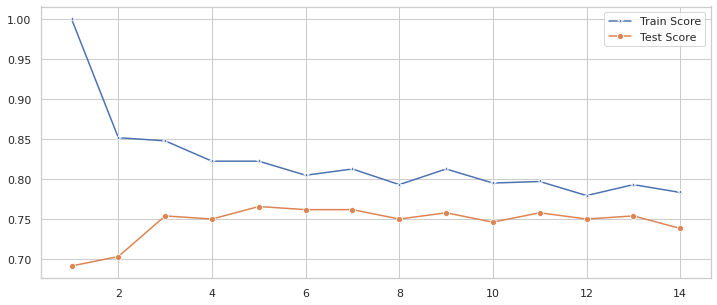

In [39]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### The best result is captured at k = 5 hence 5 is used for the final model

In [40]:
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

## Plotting a decision Boundary

/home/sushant/anaconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


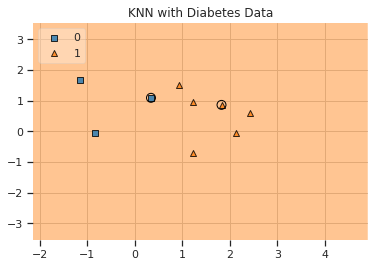

In [41]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)


plt.title('KNN with Diabetes Data')
plt.show()

# Model Performance Analysis



### Creating the confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,145,22,167
1,38,51,89
All,183,73,256


Text(0.5, 12.5, 'Predicted label')

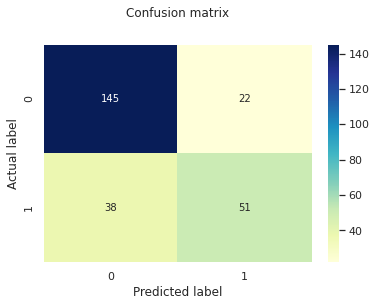

In [43]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall. 
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        


In [44]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.70      0.57      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



## 3. ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [45]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

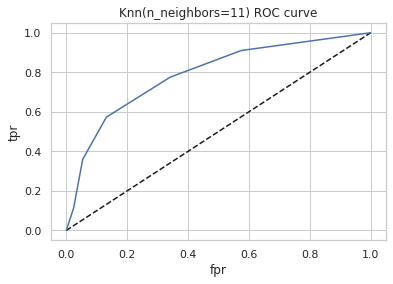

In [46]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [47]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7888380542286214

## Creating the Web APP

In [ ]:
from flask import Flask,render_template,url_for,redirect,request
app = Flask(__name__)

@app.route("/")
@app.route("/home")
def home():
    return render_template("home.html")


@app.route("/predict")
def predict():
    return render_template("predict.html")

@app.route("/logout")
def logout():
    return redirect(url_for("home"))

@app.route("/submit",methods=['POST','GET'])
def submit():
    if request.method=="POST":
        gl = request.form["glucose_level"]
        bmi = request.form["bmi"]
        il = request.form["insulin_level"]
        st = request.form["skin_thickness"]
        dpf = request.form["dpf"]
        age = request.form["age"]
        bp = request.form["bp"]
        n_preg = request.form["n_preg"]
        
        n_arr = np.array([[n_preg,gl,bp,st,il,bmi,dpf,age]])
        f_arr = np.asfarray(n_arr, dtype = float)
        y_p = knn.predict(n_arr)
        
        if(y_p[0]==0):
            return f"You have slim chance of testing positive for testing positive for Diabetes, you should keep living a healthy life regardless"
        
        return f"You have a high chance of testing positive for testing positive for Diabetes, you should consult a doctor"
    else:
        gl = request.args.get("glucose_level")
        bmi = request.args.get("bmi")
        il = request.args.get("insulin_level")
        st = request.args.get("skin_thickness")
        dpf = request.args.get("dpf")
        age = request.args.get("age")
        bp = request.args.get("bp")
        n_preg = request.args.get("n_preg")
        
        n_arr = np.array([[n_preg,gl,bp,st,il,bmi,dpf,age]])
        
        f_arr = np.asfarray(n_arr, dtype = float)
        print(f_arr)
     
        y_p = knn.predict(f_arr)
        print(y_p)
        if(y_p[0]==0):
            return f"You have slim chance of testing positive for testing positive for Diabetes, you should keep living a healthy life regardless"
        else:
            return f"You have a high chance of testing positive for testing positive for Diabetes, you should consult a doctor"
   
   


if __name__=="__main__":
    app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/May/2022 11:25:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2022 11:25:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/May/2022 11:25:34] "GET /predict HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2022 11:25:44] "GET /submit?glucose_level=89&bmi=28.1&insulin_level=94&skin_thickness=23&dpf=0.1627&age=21&bp=1&n_preg=0 HTTP/1.1" 200 -


[[ 0.     89.      1.     23.     94.     28.1     0.1627 21.    ]]
[1]
